# TP3 Application de la loi des grand nombres: estimation de la fiabilité d'une estimation par bootstrap

On ne peut pas maîtriser les sujets techniques sans pratique, c'est pourquoi les travaux pratiques (TPs) sont une partie importante du cours de sciences des données.

Si vous restez bloqué plus de quelques minutes sur des questions dans une partie non notée d'un TP, demandez de l'aide à un enseignant ou à un camarade de classe (Expliquer les choses est également bénéfique : la meilleure façon de consolider votre connaissance d'un sujet est de l'expliquer). Ne vous contentez pas de juste partager vos réponses sans explication, personne n'en bénéficierait.


#### TP d'aujourd'hui

Dans le TP d'aujourd'hui, vous allez travailler les compétences suivantes:

1. Implémenter la méthode du bootstrap en python
2. Appliquer la méthode du bootstrap pour évaluer l'incertitude associée à des estimations
 
<font color='red'>**La deuxième partie du TP est à rendre et notée. Le rendu doit obligatoirement se faire par le biais d'amétice avant la fin de la séance de TP.**</font>

# 1. Evaluation de l'incertitude associée à une estimation par la méthode du boostrap (durée indicative 1h)

## 1.1 Implémentation de la méthode du bootstrap en python (durée indicative 30min)

Nous commencons par importer les modules numpy, pandas et seaborn dont nous allons avoir besoin

In [1]:
import numpy as np
import pandas
import seaborn

Nous créons un générateur de nombre aléatoires à l'aide de la librairie numpy.random, que nous appelons `rng`.

In [2]:
rng = np.random.default_rng()

A présent, implémentons la méthode du bootstrap en python. Pour rappel, étant donné un échantillon de données $x_1, x_2, ..., x_n$ et une estimation $\hat{\theta} = f(x_1, x_2, ..., x_n)$ sur la base de cet échantillon d'un paramètre d'intérêt $\theta$ (par exemple pour estimer la moyenne de la population dont est tiré l'échantillon, on pourrait calculer la moyenne de l'échantillon), la méthode consiste à:

- Tirer un grand nombre d'échantillons de taille $n$ de la distribution empirique de l'échantillon. Disons $1000$ pour ce TP
- Estimer le paramètre d'intérêt séparémment pour chacun de ces $1000$ échantillons de taille
   $n$. Notons $\tilde{\theta}_1, \tilde{\theta}_2,..., \tilde{\theta}_{1000}$ les $1000$ valuers obtenues
- Se baser sur la distribution empirique de $\tilde{\theta}_1, \tilde{\theta}_2,..., \tilde{\theta}_{1000}$ pour évaluer l'incertitude associée à notre estimation $\hat{\theta}$ de $\theta$.

Pour implémenter cette méthode en python, commençons par écrire une fonction `get_samples_from_empirical_distribution_of_base_sample` pour tirer des échantillons de la distribution empirique de notre échantillon de départ $x_1, x_2, ..., x_n$.

Nous écrivons une fonction qui prend en argument l'échantillon de départ sous le nom  `base_sample` et le nombre d'échantillons à tirer sous le nom `nb_samples` et qui renvoie l'échantillon obtenu sous la forme d'une liste.

Tirer un échantillon de la distribution empirique de l'échantillon $x_1, x_2, ..., x_n$ revient simplement à choisir un élément de l'échantillon au hasard, ce qui peut être implémenté avec la méthode `choice` des générateurs de nombre aléatoire de `numpy.random`.

In [5]:
def get_samples_from_empirical_distribution_of_base_sample(base_sample, nb_samples):
    samples = []
    for i in range(nb_samples):
        samples.append(rng.choice(base_sample))
    return samples

Testons notre méthode sur un échantillon inventé $2, 2, 3, 4$. La distribution empirique de cette échantillon donne une probabilité de 1/2 à la valeur 2, et de 1/4 aux valeurs 3 et 4.

In [19]:
get_samples_from_empirical_distribution_of_base_sample([2, 2, 3, 4], 10)

[np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(2),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(3)]

Les valeurs renvoyée par la fonction semble bien respecter les proportions dictées par la distribution empirique de l'échantillon de départ

A présent, implémentons une fonction `reestimate_parameter` qui tire un échantillon de la distribution empirique de l'échantillon de départ de même taille que l'échantillon de départ (ce genre d'échantillon est souvent appelé un ré-échantillon de l'échantillon de départ) et qui estime le paramètre d'intérêt sur la base de ce ré-échantillon.

Nous écrivons une fonction qui prend en argument l'échantillon de départ sous le nom `base_sample` et la fonction utilisée pour estimer le paramètre d'intérêt sous le nom `estimation_function` (si on veut estimer la moyenne d'une population à partir d'un échantillon de cette population, on pourrait par exemple donner comme valeur à cet argument la fonction `np.mean`).

La fonction appelle la fonction `get_samples_from_empirical_distribution_of_base_sample` codée précédemment pour obtenir le ré-échantillon et retourne le résultat de l'application de la fonction `estimation_function` à ce ré-échantillon.

In [21]:
def reestimate_parameter(base_sample, estimation_function):
    resample = get_samples_from_empirical_distribution_of_base_sample(base_sample, len(base_sample))
    return estimation_function(resample)

Testons notre fonction sur notre échantillon inventé $2, 2, 3, 4$ en utilisant comme fonction d'estimation la moyenne `np.mean`. La moyenne de l'échantillon est $11/4=2.75$. La moyenne des ré-échantillons va dépendre des valeurs incluse dans le ré-échantillon et devrait fluctuer entre un minimum de $2$ pour un ré-échantillon composé de quatre $2$ et un maximum de $4$ pour un ré-échantillon composé de quatre $4$.

In [27]:
reestimate_parameter(base_sample=[2, 2, 3, 4], estimation_function=np.mean)

np.float64(2.75)

Pour finir d'implémenter la méthode du bootstrap telle que décrite plus haut, il ne nous reste plus qu'à réiterer $1000$ fois le processus de ré-estimation du paramètre d'intérêt à partir d'un ré-échantillon.

In [28]:
def get_boostrap_distribution_of_estimated_parameter(base_sample, estimation_function, nb_resamples=1000):
    samples = []
    for i in range(nb_resamples):
        samples.append(reestimate_parameter(base_sample, estimation_function))
    return samples

Testons à présent la méthode complète sur un échantillon de taile $400$ d'une distribution uniforme sur l'intervalle $[0,1[$ pour l'estimation de la moyenne. Ici, comme il s'agit d'un échantillon simulé, nous connaissons sa distribution réelle (distribution uniforme sur $[0,1[$) et nous savons donc que la moyenne de la population est l'espérance de cette distribution, c'est à dire $1/2$ (dans le reste du TP nous travaillerons avec des données réelles, pour lesquelles la distribution de la population n'est pas connue).

Créons d'abord l'échantillon désiré et représentons sa distribution empirique par le biais d'un histogramme

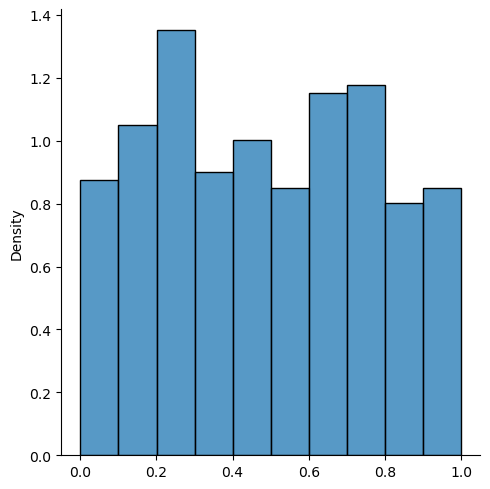

In [34]:
base_sample = rng.uniform(0, 1, 400)
seaborn.displot(data=base_sample, kind='hist', stat='density')

La taille de l'échantillon semble suffisant ici pour que la distribution empirique de l'échantillon fournisse une approximation raisonnable de la distribution réelle des données. On s'attend donc à ce que la méthode du bootstrap, qui dépend de la qualité de cette approximation, donne des résultats fiables ici.

In [32]:
np.mean(base_sample)

np.float64(0.49469537050105855)

Nous voyons aussi ci-dessus que la moyenne de l'échantillon est assez proche de la moyenne de la population.

Appliquons la méthode du boostrap à notre exemple

In [39]:
estimation_function = np.mean
mean_estimates_from_boostrap_method = get_boostrap_distribution_of_estimated_parameter(base_sample, estimation_function)

Représentons sur un histogramme la distribution produite par la méthode du boostrap pour notre estimation de la moyenne

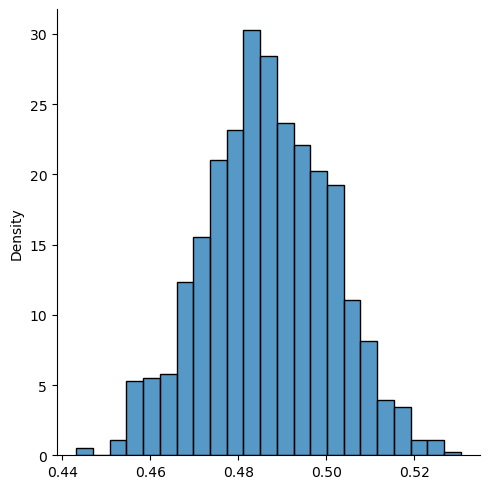

In [40]:
seaborn.displot(data=mean_estimates_from_boostrap_method , kind='hist', stat='density')

Comparons avec la distribution réelle pour notre estimation de la moyenne, qu'on peut obtenir un tirant un grand nombre de fois des échantillons de taille 400 de la vraie distribution des données

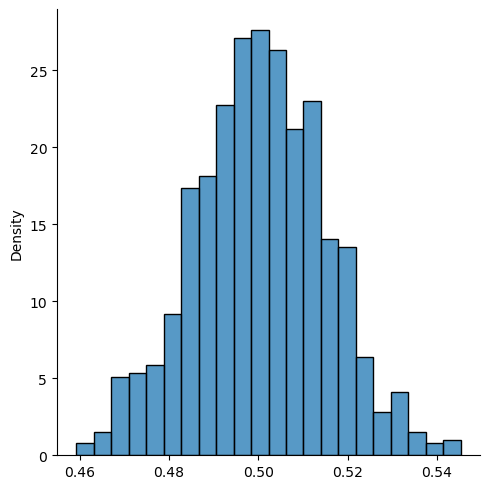

In [43]:
actual_mean_estimates = []
for i in range(1000):
    sample = rng.uniform(0, 1, 400)
    actual_mean_estimates.append(np.mean(sample))
seaborn.displot(data=actual_mean_estimates, kind='hist', stat='density')

Nous pouvons aussi calculer les écarts-types pour la distribution obtenue par boostrap et pour la distribution réelle de notre estimateur de la moyenne d'une loi uniforme à partir d'un échantillon de taille $400$:

In [45]:
print(np.array(actual_mean_estimates).std())
print(np.array(mean_estimates_from_boostrap_method).std())

0.014704793335890452
0.014082609710570466


On voit que la méthode du boostrap représente très bien l'incertitude associée à l'estimation de la moyenne d'une loi uniforme à partir d'un échantillon de taille $400$, avec peut-être une légère sous-estimation de cette incertitude.

Ce qui est remarquable c'est qu'elle permet de faire cela sur la base d'un seul échantillon de taille $400$.

## 1.2 Application au jeu de données sur les salaires en science des données (durée indicative 30min)

(Jeu de données utilisé précédemment dans le cadre du TP1)

In [49]:
import pandas

data = pandas.read_csv("ds_salaries.csv")
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Ici nous voudrions savoir si la taille des entreprise influe sur le salaire. Nous allons nous concentrer sur un sous-ensemble du jeu de données pour essayer d'aborder cette question en minimisant l'influence de variables confondantes. Nous choisissons de nous concentrer sur les employés seniors, travaillant à temps plein aux Etats-Unis dans une entreprise des Etats-Unis, qui constituent une grande part du jeu de données.

Regardons le nombre de points de données disponibles par année et taille d'entreprise:

In [68]:
data[(data['experience_level'] == 'SE') &
     (data['employment_type'] == 'FT') &
     (data['employee_residence'] == 'US') &
     (data['company_location'] == 'US')].groupby(['company_size', 'work_year'])['salary_in_usd'].count()

company_size  work_year
L             2020            4
              2021           22
              2022           88
              2023           42
M             2020            1
              2021            6
              2022          934
              2023         1140
S             2020            1
              2021            4
              2022            3
              2023            3
Name: salary_in_usd, dtype: int64

Il semble y avoir suffisamment de données pour espérer obtenir des résultats intéressants en 2022 et 2023. Regardons ce qui se passe en 2022 (vous pouvez refaire l'analyse pour 2023 en changeant la valeur de la variable ci-dessous)

In [51]:
year=2022 # 2023

Ci-dessous nous sélectionnons la portion des données qui nous intéresse et l'assemblons dans un dataframe `df_LM`

In [55]:
df_L = data[(data['experience_level'] == 'SE') &
                (data['employment_type'] == 'FT') &
                (data['employee_residence'] == 'US') &
                (data['company_location'] == 'US') & 
                (data['work_year'] == year) &
                (data['company_size'] == 'L')]

In [56]:
df_M = data[(data['experience_level'] == 'SE') &
                (data['employment_type'] == 'FT') &
                (data['employee_residence'] == 'US') &
                (data['company_location'] == 'US') & 
                (data['work_year'] == year) &
                (data['company_size'] == 'M')]

In [57]:
df_LM = pandas.concat([df_L, df_M])[['company_size', 'salary_in_usd']]


In [58]:
df_LM

,company_size,salary_in_usd
775,L,130000
1019,L,192000
1821,L,125000
2060,L,190000
2207,L,230000
...,...,...
3417,M,80000
3440,M,135000
3441,M,115000
3449,M,165000


Regardons les salaires moyens pour les moyennes et grandes entreprises

In [60]:
df_LM.groupby('company_size').mean()

,salary_in_usd
company_size,
L,168076.522727
M,152321.805139


Le salaire semble plus élevé dans les grandes entreprises. Mais la différence observée pourrait-elle être due à des fluctuations aléatoires ou représente-t-elle une différence réelle de salaire entre les deux types d'entreprises?

Nous pouvons regarder la distribution empirique des salaires dans notre échantillon

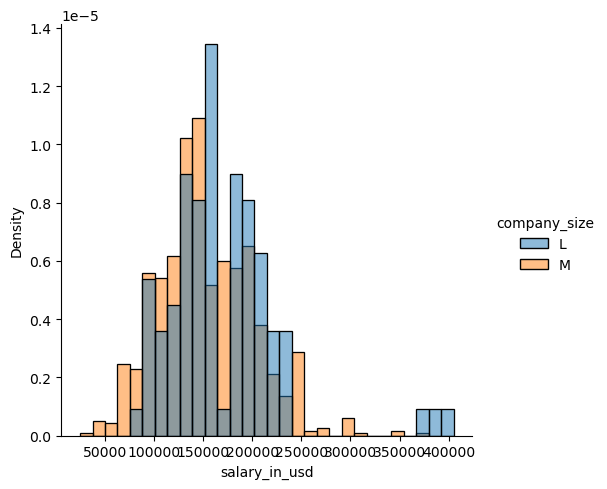

In [61]:
seaborn.displot(data=df_LM, x='salary_in_usd', hue='company_size', kind='hist', stat='density', common_norm=False)

La différence n'est pas flagrante sur cette figure... Utilisons la méthode du bootstrap pour essayer d'y voir plus clair

In [62]:
sample_L = df_L['salary_in_usd']
sample_M = df_M['salary_in_usd']

In [63]:
sample_L

775     130000
1019    192000
1821    125000
2060    190000
2207    230000
         ...  
3319    140400
3463    405000
3468    380000
3470    177000
3482    144000
Name: salary_in_usd, Length: 88, dtype: int64

In [64]:
sample_M

1258    375000
1822    175000
1823    155000
1824    153600
1825    106800
         ...  
3417     80000
3440    135000
3441    115000
3449    165000
3460    152500
Name: salary_in_usd, Length: 934, dtype: int64

In [65]:
bootstrapped_mean_salary_L = get_boostrap_distribution_of_estimated_parameter(sample_L, np.mean)
bootstrapped_mean_salary_M = get_boostrap_distribution_of_estimated_parameter(sample_M, np.mean)

Mettons les résultats dans une DataFrame pandas pour pouvoir les représenter graphiquement avec seaborn

In [66]:
bL = pandas.DataFrame({'mean_salary': bootstrapped_mean_salary_L, 'size': ['L']*len(bootstrapped_mean_salary_L)})
bM = pandas.DataFrame({'mean_salary': bootstrapped_mean_salary_M, 'size': ['M']*len(bootstrapped_mean_salary_M)})
b = pandas.concat([bL, bM])

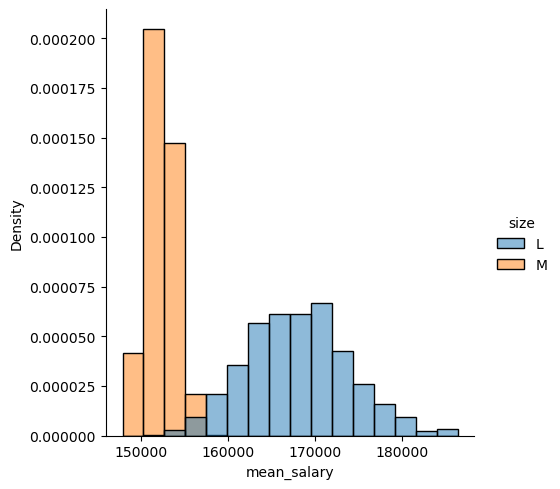

In [67]:
seaborn.displot(data=b, x='mean_salary', hue='size', kind='hist', stat='density', common_norm=False)

Les distributions estimées par bootstrap pour le salaires moyen dans les deux types d'entreprises sont relativement bien séparés. Cela suggère que la différence de salaire observée n'est pas une simple fluctuation aléatoire.

Cela reste un résultat très préliminaire cependant. Nos conclusions pourraient être beaucoup plus fortes si nous avions une hypothèse causale concernant l'origine de cette différence de salaires et si nous réalisions un expérience soigneusement conçue pour tester cette hypothèse causale.

# 2. Généralisation à un nouvel exemple <font color='red'>(partie notée, à rendre individuellement, durée indicative 1h)</font>

<font color='red'>**Cette partie est à rendre et notée. Le rendu doit obligatoirement se faire par le biais d'amétice avant la fin de la séance de TP.**</font> Chacun d'entre vous doit rendre un travail personnel pour cette partie, différent de celui de tous les autres étudiants. Les recopies et plagiats seront séverement sanctionnés.

Nous vous proposons ci-dessous un jeu de données à explorer avec les outils que nous avons vu en cours+TD+TP (vous pouvez utiliser un autre jeu de données si vous le souhaitez---vous pouvez regarder les jeux de données disponibles sur kaggle.com---mais faites attention à ne pas perdre trop de temps à vous le procurer, car vous devez rendre quelque chose avant la fin de la séance de TP).

Vous devez (i) introduire et motiver une question de votre choix (vous pouvez reprendre la question que vous aviez choisi pour le TP1, par exemple), (ii) appliquer la méthode du bootstrap vue ci-dessus pour évaluer l'incertitude associée au quantités estimée pour répondre à votre question et (iii) interpréter les résultats obtenus.

La grille d'évaluation suivante sera utilisée pour noter vos travaux:

1. Motivation de l’analyse réalisée
    - Analyse clairement pertinente et bien justifiée : 5
    - Motivation partiellement claire, mais manque de précision : 2,5
    - Motivation incompréhensible ou absente : 0

2. Interprétation des résultats
    - Interprétation correcte et pertinente des résultats : 5
	- Interprétation partiellement correcte, mais quelques lacunes : 2,5
	- Interprétation douteuse, incomplète ou manquante : 0

3. Capacité à généraliser les notions vues en cours
    - Analyse innovante sur des données inédites : 5
    - Analyse partiellement nouvelle (nouvelles données ou nouvelle approche sur des données vues en cours/TD/TP) : 2,5
    - Analyse quasi identique à une vue en cours/TD/TP avec les mêmes données : 0

4. Correction du code
    - Code fonctionnel et sans erreurs : 2,5
    - Code fonctionnel mais avec des erreurs partielles : 1
    - Code non fonctionnel ou contenant de nombreuses erreurs : 0

5. Propreté du code
    - Code propre, bien structuré et lisible : 2,5
    - Code lisible mais désordonné ou manquant de clarté : 1
    - Code difficilement lisible et mal structuré : 0

Note totale : /20


## Jeu de données proposé

In [ ]:
# Source https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download
import pandas

data = pandas.read_csv("StudentPerformanceFactors.csv")
data

In [ ]:
# A vous de jouer

# Crédits

Ce cours est inspiré du cours data8 donné à UC Berkeley et en ré-utilise avec certaines modifications une partie des matériels (ces matériels sont généreusement mis à disposition publiquement sous licence Creative Commons avec attribution, consultez [https://www.data8.org](https://www.data8.org) pour plus d'informations.